## Objectives
>• Do data cleaning.<br>
• Do Statistical summary of columns.<br>
• Do Multivariate analysis.<br>
• Ask Questions and do deep-dive EDA.

# BANK CUSTOMER CHURN
***
> ## Data Introduction
This dataset contain informations about client's attrition in a bank. Below is the column informations:<Br>
1.CLIENTNUM = client unique ID.<Br>
2.Attrition_flag = attrition status.<br>
3.Customer_Age = client's age.<br>
4.Gender = client's gender.<br>
5.Dependent_count = total number of client's dependent.<br>
6.Education_Level = client's education level.<br>
7.Marital_Status = client's marital status.<br>
8.Income_Category = client's income range.<br>
9.Card_Category = client's card type.<br>
10.Total_Relationship_Count = total number of products held by a customers.<br>
11.Credit_Limit = client's credit card limit.<br>
12.Total_Revolving_Bal = Bill that hasn't been paid completely at the end of the month.<br>

## Data Preparation (Import libraries, data cleaning & data wrangling)
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from scipy.stats import gaussian_kde
sns.set()

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/vertikalwil/Data-Analyst/main/bank_churn.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Credit_Limit,Total_Revolving_Bal
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,5,12691.0,777
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,6,8256.0,864
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,4,3418.0,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,3,3313.0,2517
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,5,4716.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,3,4003.0,1851
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,4,4277.0,2186
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,5,5409.0,0
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,4,5281.0,0


In [3]:
df.columns = ['clientid','Attrition','Age','Gender','Dependent','Education','Marital','Income','Card','nRelationship','Credit_Limit','Total_Revolve_Bal']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   clientid           10127 non-null  int64  
 1   Attrition          10127 non-null  object 
 2   Age                10127 non-null  int64  
 3   Gender             10127 non-null  object 
 4   Dependent          10127 non-null  int64  
 5   Education          10127 non-null  object 
 6   Marital            10127 non-null  object 
 7   Income             10127 non-null  object 
 8   Card               10127 non-null  object 
 9   nRelationship      10127 non-null  int64  
 10  Credit_Limit       10127 non-null  float64
 11  Total_Revolve_Bal  10127 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 949.5+ KB


>No missing value dan dtype sudah sesuai. Tetapi pada kolom Education, Marital dan Income terdapat value yang berjenis 'Unknown' yang sebenarnya bisa kita anggap sebagai missing values.

In [5]:
len(df[(df.Income == 'Unknown') | (df.Marital == 'Unknown') | (df.Education == 'Unknown')]) / len(df)

0.30078009282117113

>total gabungan nilai unknown mencakup 30% dari data, mendrop baris tersebut saya rasa tidak dimungkinkan karena terlalu banyak.

In [6]:
dictt = {
    'Less than $40K' : 1,
    '$40K - $60K': 2,
    '$80K - $120K':4,
    '$60K - $80K':3,
    'Unknown':np.nan,
    '$120K +':5
}
dictt1 = {
    0.00 : 'Less than $40K',
    0.25 : '$40K - $60K',
    0.75 :'$80K - $120K',
    0.5  :'$60K - $80K',
    1.00 :'$120K +'
}

In [7]:
dfimpute = df[['Income','Credit_Limit']].copy()
dfimpute['Income'] = df.Income.map(dictt)
scaled = MinMaxScaler().fit_transform(dfimpute)
dfnew = pd.DataFrame(scaled)

In [8]:
def return_closest(n):
    return min([0.00, 0.25, 0.50, 0.75, 1.00], key=lambda x:abs(x-n))

In [9]:
imputer = KNNImputer(n_neighbors=20)
After_imputation = imputer.fit_transform(dfnew)
a = pd.DataFrame(After_imputation)
a[0] = a[0].apply(return_closest)
df['Income'] = a[0].map(dictt1)

In [10]:
df['Income'].value_counts()

Less than $40K    3696
$40K - $60K       2280
$60K - $80K       1725
$80K - $120K      1699
$120K +            727
Name: Income, dtype: int64

>Setelah mengulik2 dataset, saya menemukan bahwa ada hubungan antara 'Income' dan 'Credit_Limit'. Disini saya menginput nilai 'Unknown' pada 'Income' menggunakan KNNImputer dengan 'Credit_Limit' sebagai acuannya.

In [11]:
len(df[(df.Marital == 'Unknown') | (df.Education == 'Unknown')]) / len(df)

0.21269872617754518

>Income hanya memakan 9% dari total persen missing values, sedangkan untuk 21% nya lagi diisi oleh Marital dan Education.

In [12]:
x = df[df.Education != 'Unknown']['Education']
y = pd.DataFrame(np.random.choice(list(x.unique()),p=[0.234, 0.363, 0.173, 0.118, 0.060, 0.052], size=len(df[df.Education == 'Unknown'])), columns=['Edu'])
y.index = df[df.Education == 'Unknown'].index
df.loc[y.index,'Education'] = y.Edu

In [13]:
df.Education.value_counts()

Graduate         3667
High School      2383
Uneducated       1759
College          1172
Post-Graduate     616
Doctorate         530
Name: Education, dtype: int64

In [14]:
x = df[df.Marital != 'Unknown']['Marital']
y = pd.DataFrame(np.random.choice(list(x.unique()),p=[0.50, 0.42, 0.08], size=len(df[df.Marital == 'Unknown'])), columns=['Mar'])
y.index = df[df.Marital == 'Unknown'].index
df.loc[y.index,'Marital'] = y.Mar

In [15]:
df.Marital.value_counts()

Married     5046
Single      4261
Divorced     820
Name: Marital, dtype: int64

>Kedua kolom 'Education' dan 'Marital' tidak memiliki hubungan yang kuat dengan kolom manapun sehingga saya mencoba mengimpute 'Unknown' value berdasarkan proporsi/fraction value dari masing2 kolom (univariate impute). Note : Jika dalam kasus real, saya akan mencoba untuk meneliti kembali kenapa bisa muncul value unknown karena dalam kasus pengajuan kartu kredit sangat kecil kemungkinan informasi nasabah bisa 'Unknown' khususnya untuk kolom 'Income' yang sangat krusial dalam pertimbangan acc kartu kredit.

In [16]:
#jika 'True' maka tidak ada duplikat.
df.clientid.nunique() == len(df)

True

In [17]:
#Membuang string customer agar lebih singkat saja.
df['Attrition'] = df.Attrition.str.replace(' Customer','')

In [18]:
#drop kolom clientid karena sudah tidak diperlukan.
df.drop(columns=['clientid'], inplace=True)

In [19]:
df['DebtRatio'] = df.Total_Revolve_Bal / df.Credit_Limit 

>Disini saya membuat 1 fitur 'DebtRatio' yang saya rasa cukup penting yaitu rasio antara hutang yang belum dibayar dibagi dengan limit kartu kreditnya. Catatan penting : DebtRatio sebenarnya lebih tepat jika kita menggunakan kolom 'KreditUsage' atau pemakaian kartu kredit per bulan dari pada menggunakan kredit limit. Tetapi karena kolom tersebut tidak ada, maka kita akan tetap menggunakan Credit_Limit hanya saja jika menggunakan kolom ini maka akan muncul 2 kemungkinan jika nilai DebtRatio tersebut rendah. Kemungkinan pertama, Customer menggunakan sebagian besar jumlah dari limit kartu kreditnya dan membayar sebagian besar hutangnya dengan tepat waktu. Kemungkinan kedua, Customer menggunakan jumlah kredit yang sedikit dari limit kartu kreditnya tetapi sama sekali tidak/belum membayar hutangnya. 2 kemungkinan diatas adalah skenario yang benar-benar berbeda tetapi akan menghasilkan nilai DebtRatio yang rendah. Kita harus aware bahwa kemungkinan ada Customer yang memiliki kartu kredit limit tinggi namun hanya menggunakan sebagian kecil nilai kredit yang ada. Pada tugas EDA kali ini saya akan menganggap bahwa semua customer menggunakan sebagian besar dari limit kartu kreditnya.

In [20]:
def numericategoric(df):
    num = len(df._get_numeric_data().columns)
    cat = len(df.columns) - num
    print("TotalNumericalData = " + str(num))
    print("TotalCategoricalData = " + str(cat))
    print("Numerical = " + str(list(df._get_numeric_data().columns )))
    print("Categorical = " + str(list(df.drop(df._get_numeric_data().columns, axis=1).columns)))

In [21]:
numericategoric(df)

TotalNumericalData = 6
TotalCategoricalData = 6
Numerical = ['Age', 'Dependent', 'nRelationship', 'Credit_Limit', 'Total_Revolve_Bal', 'DebtRatio']
Categorical = ['Attrition', 'Gender', 'Education', 'Marital', 'Income', 'Card']


>Pada dataset ini, kolom numerical dan kategorical sudah cukup equal. Pada numerical, 4 kolom merupakan continuous dan 2 discrete. Untuk Categorical, campuran terhadap ordinal, binary dan nominal.

In [22]:
#Membagi kolom2 numerikal dan categorical 
dfnum = df._get_numeric_data()
dfcat = df.drop(columns = dfnum.columns)

## Exploratory data analysis.
***
### Descriptive Statistics

In [23]:
dfnum.describe()

,Age,Dependent,nRelationship,Credit_Limit,Total_Revolve_Bal,DebtRatio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,3.812580,8631.953698,1162.814061,0.274892
std,8.016814,1.298908,1.554408,9088.776650,814.987335,0.275689
min,26.000000,0.000000,1.000000,1438.300000,0.000000,0.000000
25%,41.000000,1.000000,3.000000,2555.000000,359.000000,0.022714
50%,46.000000,2.000000,4.000000,4549.000000,1276.000000,0.175650
75%,52.000000,3.000000,5.000000,11067.500000,1784.000000,0.502691
max,73.000000,5.000000,6.000000,34516.000000,2517.000000,0.998768


>1.Untuk kolom Age dan Total_Revolve_Bal sudah cukup simetris dimana mean dan median tidak berbeda terlalu jauh namun untuk kolom Credit_Limit dan DebtRatio terlihat positive skew.<br>
2.Untuk nilai min dan max semua sudah wajar.<br>
3.Untuk DebtRatio nilai max yang bisa dimiliki adalah 1 karena Total_Revolve_Bal tidak bisa melewati nilai Credit_Limitnya.<Br>
4.Untuk nRelationship nilai min yang bisa dimiliki adalah 1 karena penggunaan kartu kredit yang sedang berlansung juga termasuk hitungan di nRelationship.

In [24]:
dfcat.describe()

,Attrition,Gender,Education,Marital,Income,Card
count,10127,10127,10127,10127,10127,10127
unique,2,2,6,3,5,4
top,Existing,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3667,5046,3696,9436


>1.Untuk kolom attrition valuesnya imbalanced yaitu sekitar 85% adalah Existing Customer (Not Churn).<br>
2.Untuk gender terlihat value yang paling banyak adalah female namun jumlahnya tidak berbanding terlalu jauh dengan male.<Br>
3.Untuk Education, value yang terbanyak adalah Graduate.<br>
4.Untuk Marital, mayoritas adalah Married. Jumlahnya cukup banyak yaitu sekitar 50%.<br>
5.Untuk Income, mayoritas adalah yang berincome paling rendah yaitu Less than 40K.<br>
6.Untuk kartu, mayoritas adalah pengguna kartu blue dimana jumlahnya sangat banyak yaitu sekitar 94%.<br>

In [25]:
for col in dfcat.columns:
  print(f"Value counts for column {col}:")
  print(df[col].value_counts())
  print("---"*10)
  print("\n")

Value counts for column Attrition:
Existing    8500
Attrited    1627
Name: Attrition, dtype: int64
------------------------------


Value counts for column Gender:
F    5358
M    4769
Name: Gender, dtype: int64
------------------------------


Value counts for column Education:
Graduate         3667
High School      2383
Uneducated       1759
College          1172
Post-Graduate     616
Doctorate         530
Name: Education, dtype: int64
------------------------------


Value counts for column Marital:
Married     5046
Single      4261
Divorced     820
Name: Marital, dtype: int64
------------------------------


Value counts for column Income:
Less than $40K    3696
$40K - $60K       2280
$60K - $80K       1725
$80K - $120K      1699
$120K +            727
Name: Income, dtype: int64
------------------------------


Value counts for column Card:
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card, dtype: int64
------------------------------




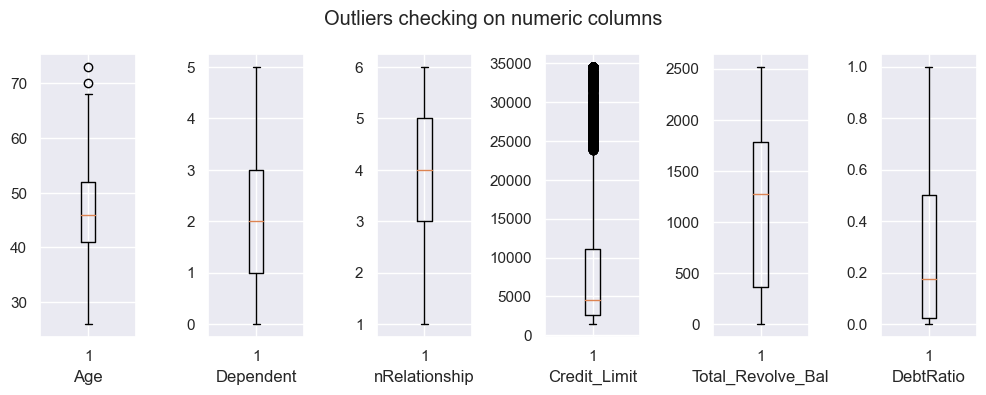

In [26]:
fig, axarr = plt.subplots(1,6, figsize=(10, 4))
for x in dfnum.columns:
    axarr[dfnum.columns.get_loc(x)].boxplot(df[x])
    axarr[dfnum.columns.get_loc(x)].set_xlabel(x)
plt.suptitle("Outliers checking on numeric columns")
fig.tight_layout(pad=1)
plt.show() 

>Untuk outliers, semuanya terlihat wajar dan merupakan data valid.

### Multivariate Analysis

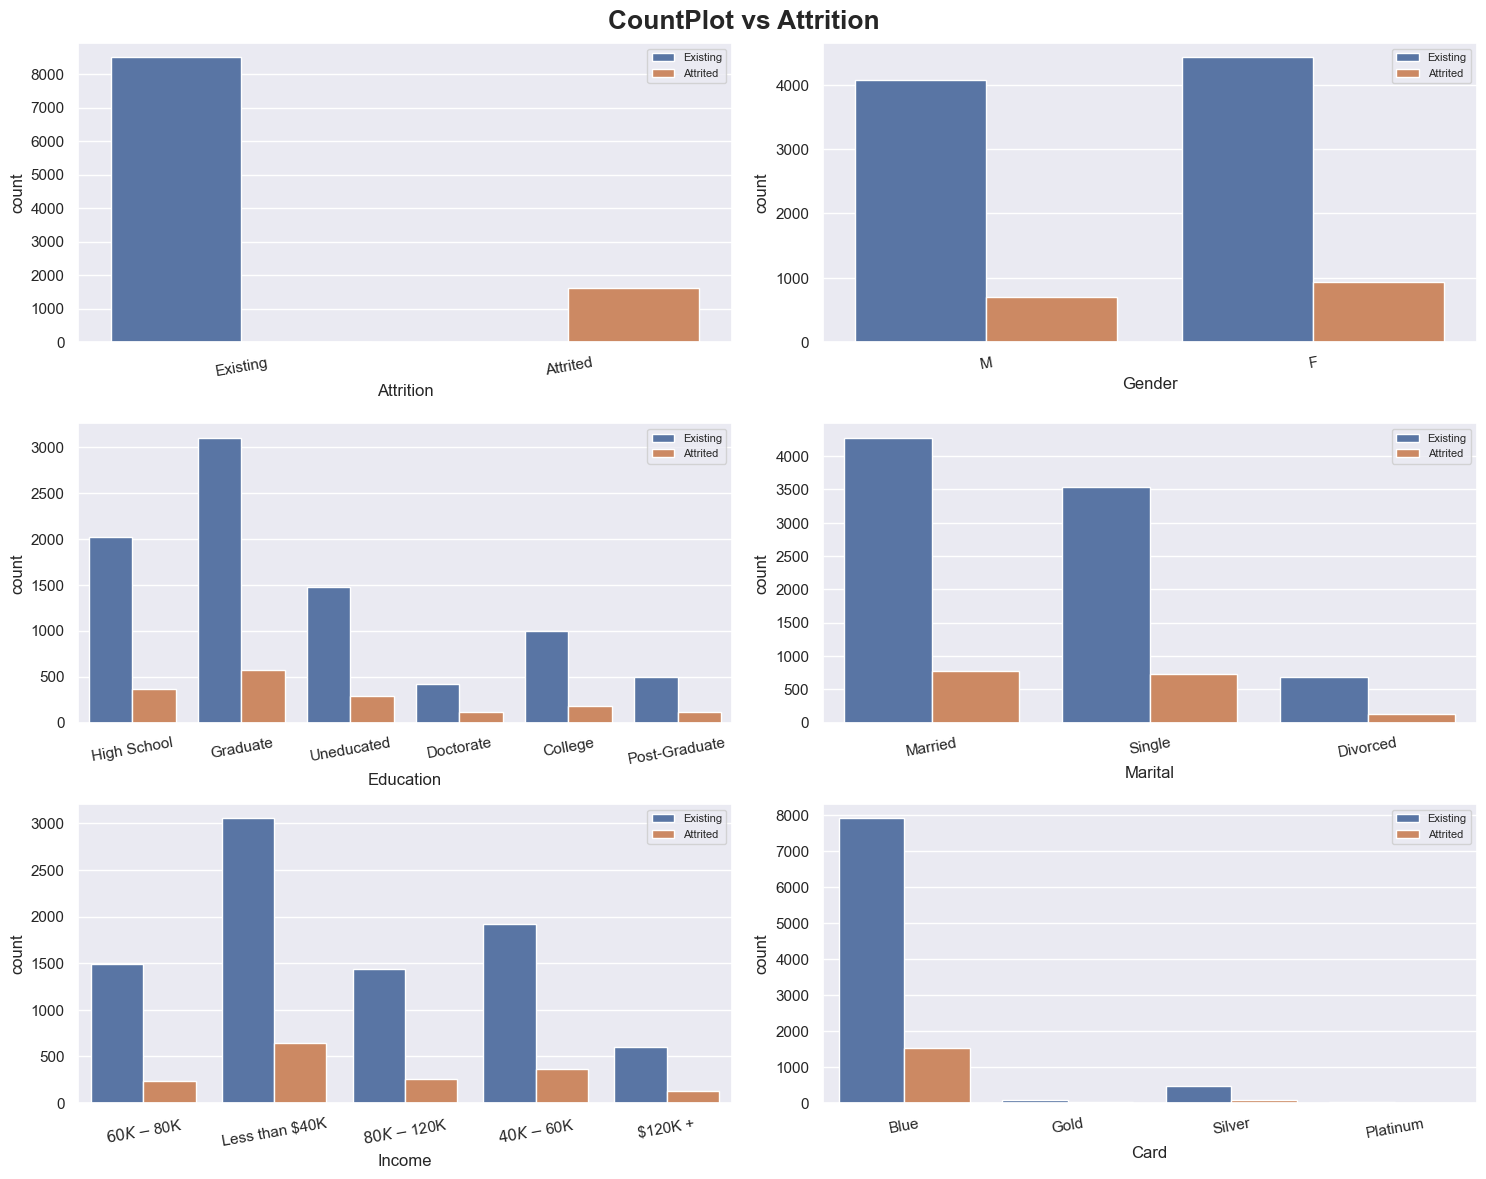

In [27]:
plt.figure(figsize=(15,12))

features = dfcat.columns
for i in np.arange(1, len(features)+1):
    plt.subplot(3, len(features)//3 , i)
    sns.countplot(data=df, x=df[features[i-1]], hue='Attrition')
    plt.legend(prop={'size': 8})
    plt.xticks(rotation=10)
    plt.xlabel(features[i-1])
plt.suptitle('CountPlot vs Attrition', size=19, weight='bold')
plt.tight_layout(pad = 1)

>Dari countplot diatas, terlihat tidak banyak info/insights yang menarik. Semua kolom terlihat terbagi cukup rata/stagnant antara yang Existing dan Attrited. Info yang bisa didapat hanyalah jumlah produk, contohnya pada kategori 'Card' kartu blue adalah yang terbanyak.

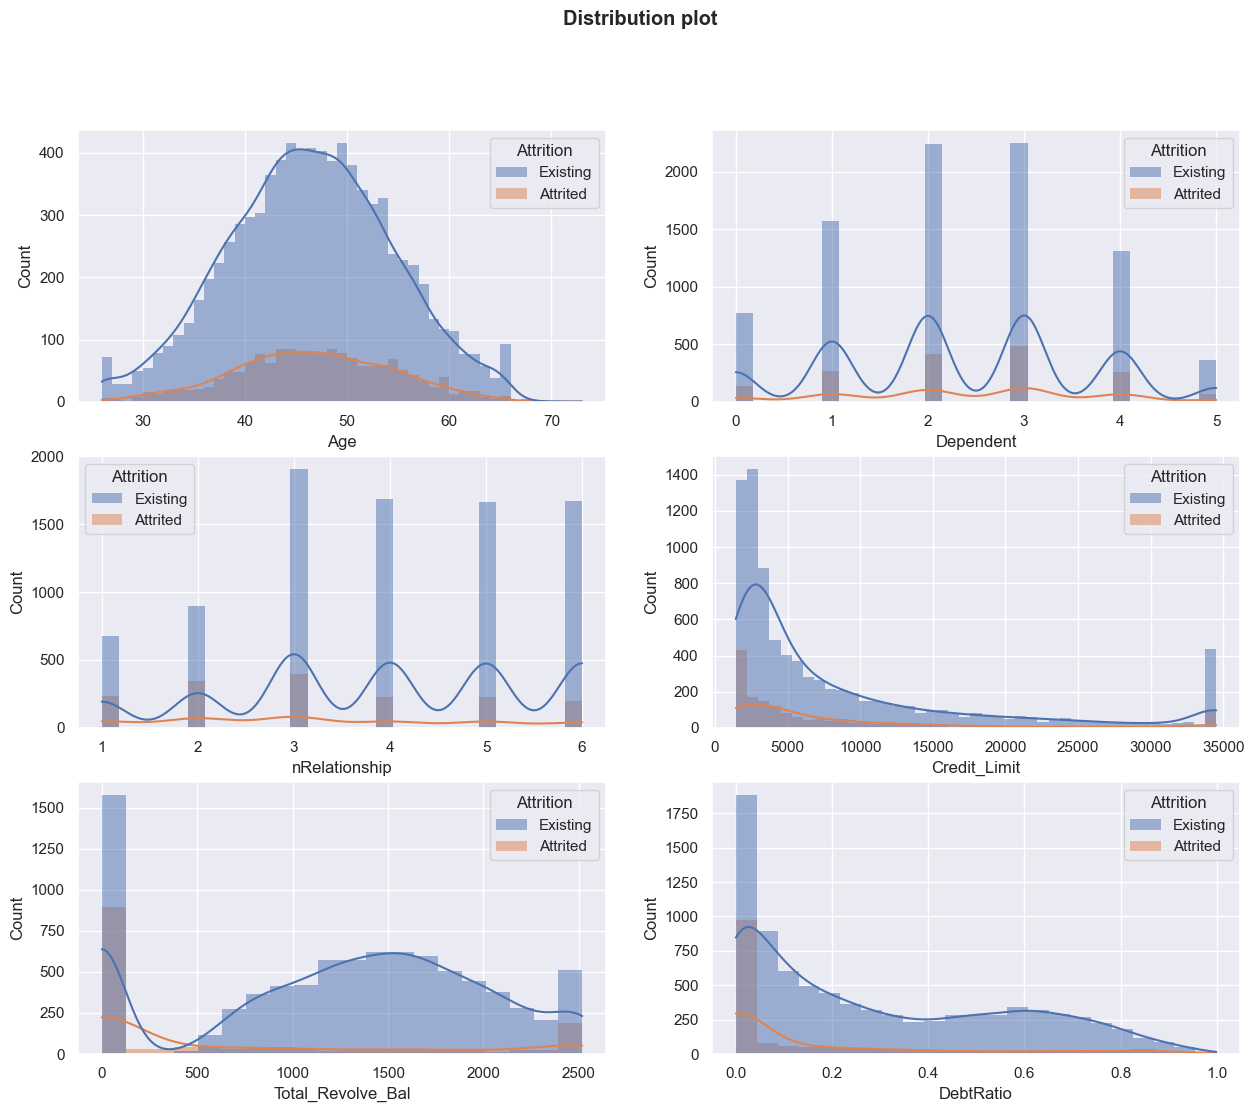

In [28]:
plt.figure(figsize=(15,12))

features = dfnum.columns
for i in np.arange(1, len(features)+1):
    plt.subplot(3, len(features)//3 , i)
    sns.histplot(data=df , x = df[features[i-1]],color='skyblue', kde=True, edgecolor='none', hue='Attrition')
plt.suptitle("Distribution plot", weight='bold')
fig.tight_layout(pad=1)

>Ada kolom yang cukup menarik yaitu Total_Revolve_Bal, sepertinya untuk yang churn (attrited) peaknya ada di awal dan diakhir tetapi untuk bagian tengahnya sangat landai, berbeda sekali untuk yang tidak churn (existing). Untuk kolom 'Age' terlihat mengikuti normal distribusi. Untuk Dependent, nRelationship dan Credit_Limit terlihat tidak ada hubungan yang obvious. Untuk DebtRatio relationshipnya ada sedikit mirip seperti Total_Revolve_Bal.

In [29]:
#mengubah ordinal/binary column menjadi numerik.
dfcorr = df.copy()
binary = ['Attrition','Gender']
ordinal = ['Income','Card','Education']
value_mapping_binary = {
    'Existing': 0,
    'Attrited' : 1,
    'M' : 1,
    'F' : 0,
}
value_mapping_ordinal = {
    'Less than $40K':1,
    '$40K - $60K':2,
    '$60K - $80K':3,
    '$80K - $120K':4,
    '$120K +':5,
    'Blue':1,
    'Silver':2,
    'Gold':3,
    'Platinum':4,
    'Uneducated':1,
    'High School':2,
    'College':3,
    'Graduate':4,
    'Post-Graduate':5,
    'Doctorate':6
}

for col in binary:
    dfcorr[col] = dfcorr[col].map(value_mapping_binary).astype('int64')
for col in ordinal:
    dfcorr[col] = dfcorr[col].map(value_mapping_ordinal).astype('int64')

C:\Users\verti\AppData\Local\Temp\ipykernel_11212\779361340.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfcorr.corr(),annot=True, fmt='.2f')


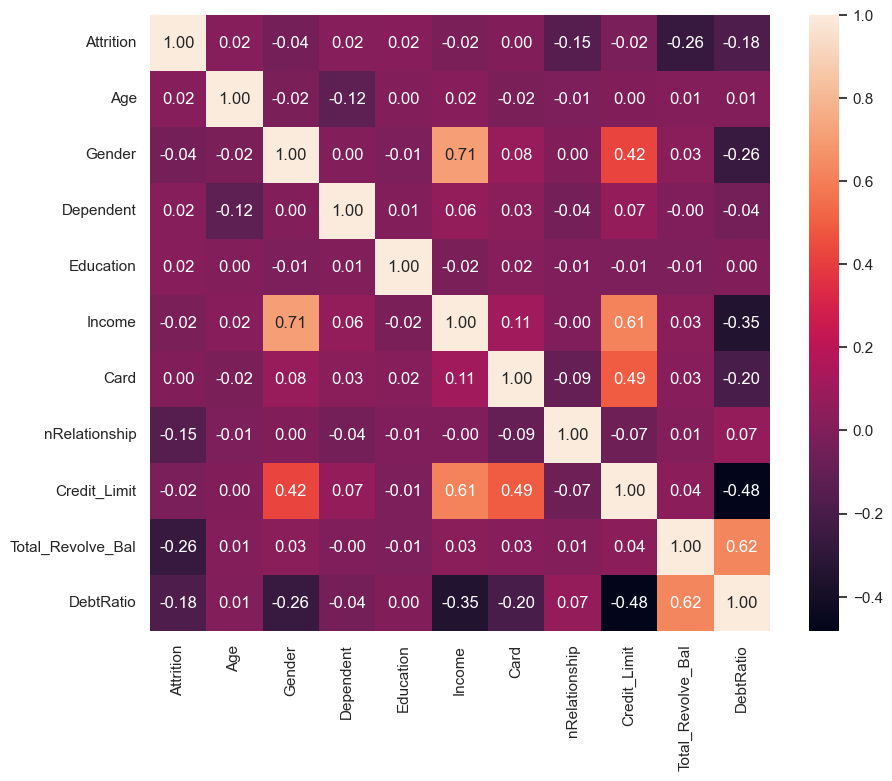

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(dfcorr.corr(),annot=True, fmt='.2f')
plt.show()

>1.Credit_Limit memiliki korelasi yang cukup oke dengan Card dan Income. Ini cukup logis, karena semakin tinggi pendapatan seseorang dan semakin 'premium' kartunya maka limit kartu kreditnya juga semakin tinggi.<br>
2.Gender memiliki korelasi yang cukup tinggi dengan Income dan Credit_Limit. Karena korelasi dengan Income yang cukup tinggi maka secara tidak langsung juga mempengaruhi Credit_Limit yang ada.<br>
3.Bisa dilihat juga bahwa Attrition memiliki korelasi negatif yang lemah dengan nRelationship dan Total_Revolve_Bal.<br>
4.DebtRatio adalah gabungan dari Credit_Limit dan Total_Revolve_Bal dan secara otomatis akan berkorelasi dengan kolom2 yang berkorelasi dengan Credit_Limit dan Total_Revolve_Bal. DebtRatio memiliki korelasi negatif rendah dengan Card, Gender dan Attrition, serta memiliki korelasi negatif sedang pada Income.

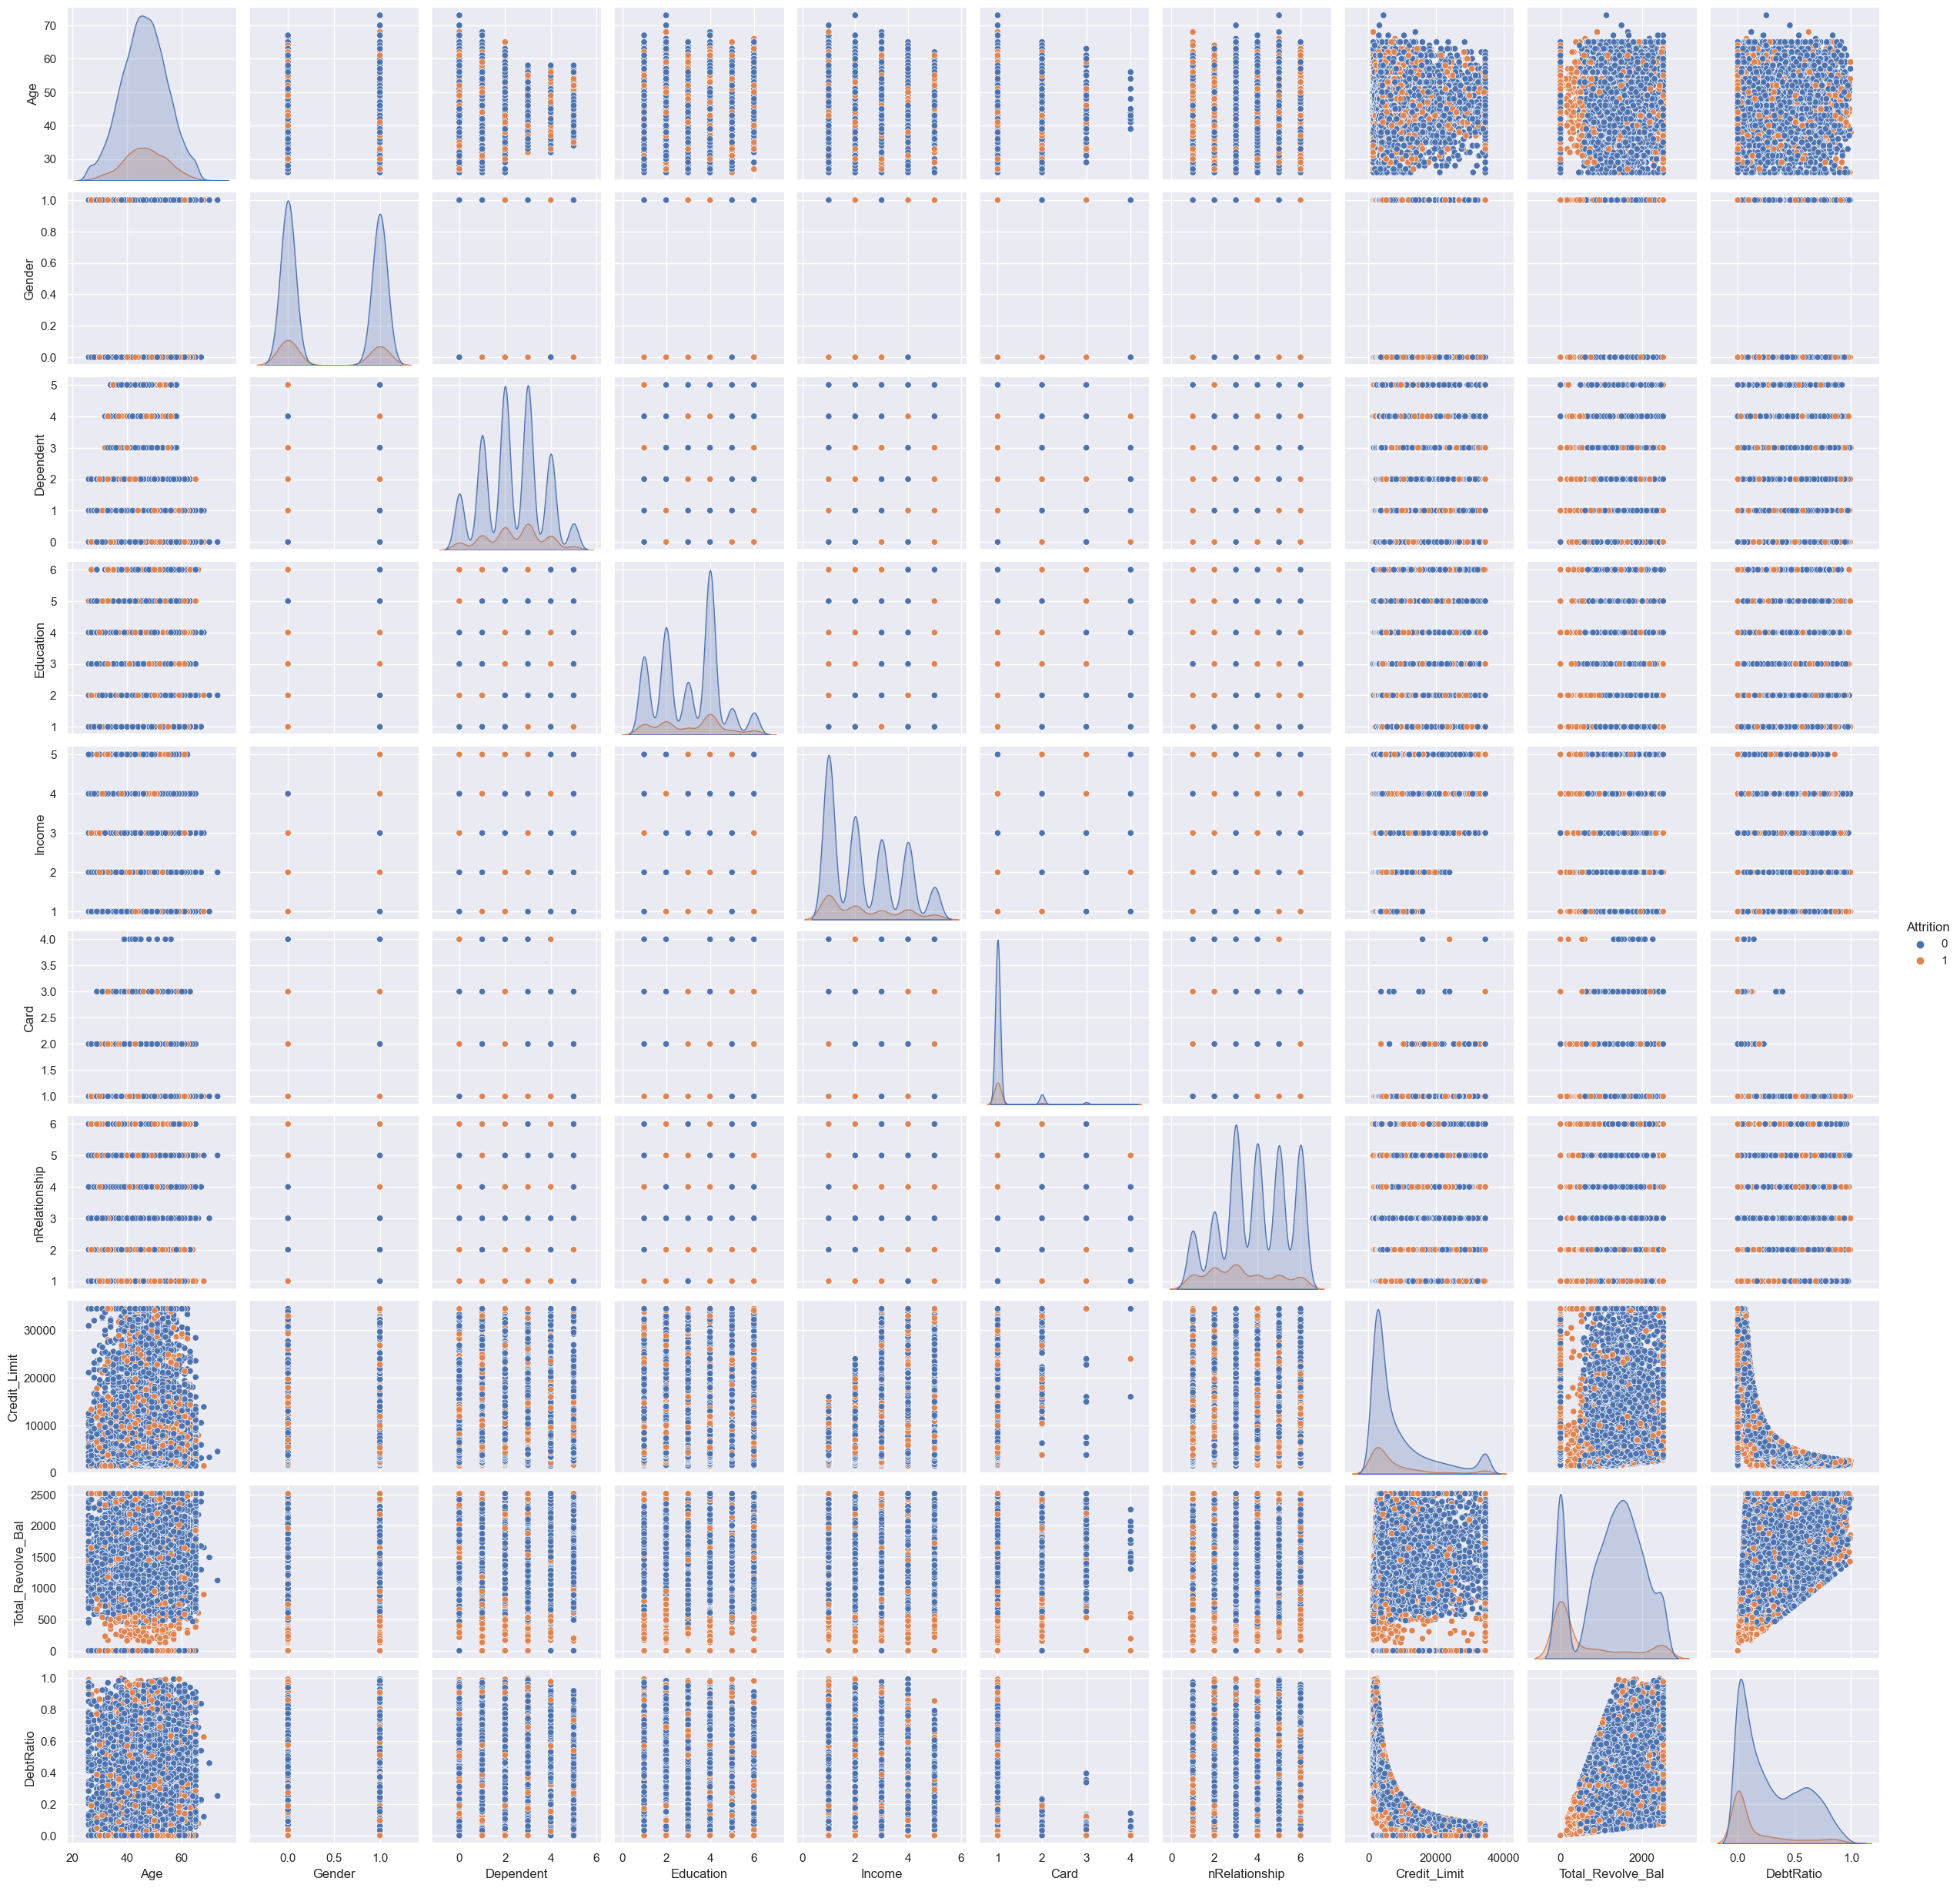

In [31]:
sns.pairplot(dfcorr, hue='Attrition')
plt.show()

## Deep-Dive Exploratory Data Analysis
***

In [32]:
df.groupby('Income')['Card'].agg(Blue = (lambda x: list(x).count('Blue') / len(x)), Gold = (lambda x: list(x).count('Gold') / len(x)),Silver = (lambda x: list(x).count('Silver') / len(x)), Platinum = (lambda x: list(x).count('Platinum') / len(x)))

,Blue,Gold,Silver,Platinum
Income,,,,
$120K +,0.887208,0.024759,0.082531,0.005502
$40K - $60K,0.949561,0.006579,0.043421,0.000439
$60K - $80K,0.924638,0.017391,0.055652,0.002319
$80K - $120K,0.878752,0.017069,0.100059,0.004120
Less than $40K,0.957251,0.006494,0.035173,0.001082


>Q1.Bagaimana karakter Income customer terhadap Card?<br>
94% dari dataset ini adalah orang yang memiliki kartu 'Blue. Bisa dilihat, orang yang berincome tinggi (diatas 80K) penggunaan kartu blue lebih rendah dari kalangan lain (walaupun nilainya masih diatas 85%) tetapi sisanya mereka lebih memilih ke silver daripada gold dan platinum.

In [33]:
df.groupby('Card')[['Credit_Limit','nRelationship']].agg('max')

,Credit_Limit,nRelationship
Card,,
Blue,34516.0,6
Gold,34516.0,6
Platinum,34516.0,5
Silver,34516.0,6


>Q2.Kenapa mayoritas customer lebih suka menggunakan kartu kredit Blue?<br>
Melihat 2 data diatas, tidak ada perbedaan keuntungan dari semua jenis kartu kredit. Terlihat bahwa kartu kredit terendah (Blue) bisa memiliki Credit_Limit yang sama dengan Platinum dan jumlah produk yang diambil (nRelationship) juga sama banyaknya. Mungkin ini penyebab mengapa semua kalangan client menggunakan kartu kredit Blue karena mungkin biaya fee bulanan yang lebih murah namun manfaatnya setara dengan kartu yang lebih premium. Untuk menjawab pertanyaan ini lebih detail, maka diperlukan data yang lebih banyak dan domain knowledge yang bagus.

In [34]:
df[df.Credit_Limit > 15000].Card.value_counts()

Blue        1260
Silver       421
Gold         112
Platinum      20
Name: Card, dtype: int64

>Disini saya memfilter khusus untuk nilai Credit_Limit yang tinggi, dan dapat dilihat bahwa pengguna kartu blue masih tetap jauh diatas kartu yang lain.

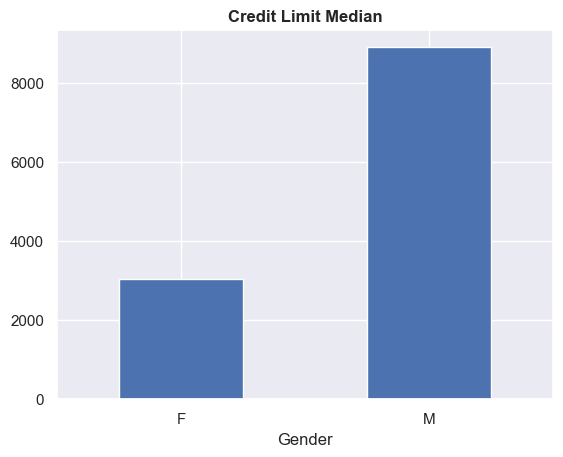

In [35]:
df.groupby('Gender')['Credit_Limit'].median().plot(kind='bar', rot=0)
plt.title('Credit Limit Median', weight='bold')
plt.show()

>Q3.Bagaimana karakteristik Credit Limit antara female dan male?<br>
Berdasarkan data korelasi diatas, didapat bahwa Gender memiliki korelasi yang kuat dengan Credit_Limit. Ternyata jumlah perbandingannya cukup menakjubkan dimana median Male hampir 3x dari Female.

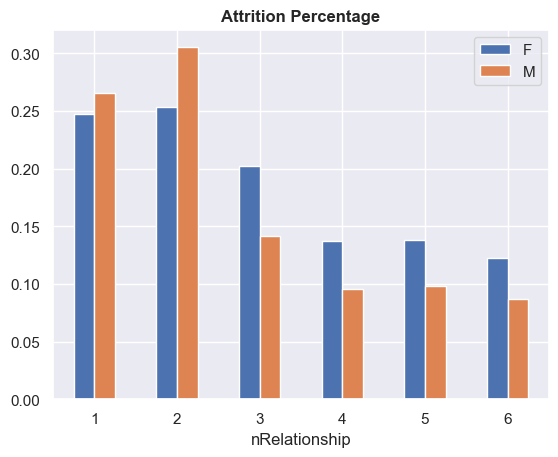

In [36]:
x = df.groupby(['nRelationship','Gender'])['Attrition'].agg(AttritedPercent = (lambda x: list(x).count('Attrited') / len(x))).reset_index()
x.pivot(index='nRelationship', columns='Gender').plot(kind='bar',rot = 0)
plt.legend(['F','M'])
plt.title('Attrition Percentage', weight='bold')
plt.show()

>Q4.Jelaskan hubungan produk yang dimiliki customer dengan tingkat Attritionnya berdasarkan Gender. <br>
Bisa dilihat dari plot diatas, untuk nRelationship 4 - 6 tingkat attrition probabilitynya cukup rendah dan equal sedangkan untuk nRelationship 1 - 3 tingkat attritionnya cukup tinggi. Baik Female dan Male patternnya cukup sama, hanya saja untuk yang Male pergerakannya lebih extreme, untuk nRelationship 1-2 didominiasi oleh Male namun mulai 3 dan seterusnya didominasi oleh Female. Kesimpulan : jumlah produk yang diambil lebih berpengaruh terhadap tingkat Attrition Male daripada Female

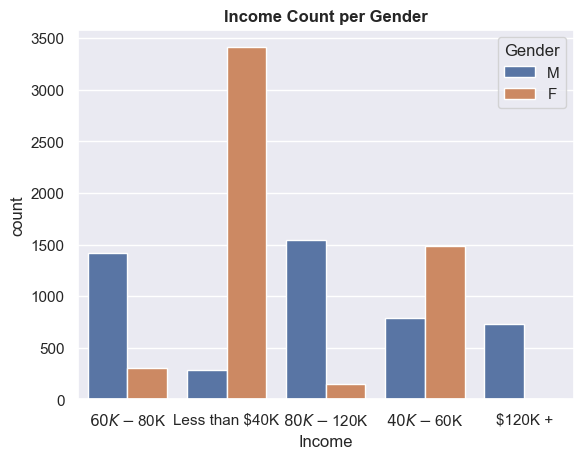

In [37]:
sns.countplot(df, x='Income', hue='Gender')
plt.title('Income Count per Gender', weight='bold')
plt.show()

>Q5.Bagaimana hubungan Income dengan Gender?<Br>
Semakin rendah Income maka akan semakin didominasi oleh gender Female. Bisa dilihat bahwa pada Income 'Less than 40K' perbandingan Female dan Male sangat jauh sekali dan pada Income 120K + tidak ada female sama sekali.

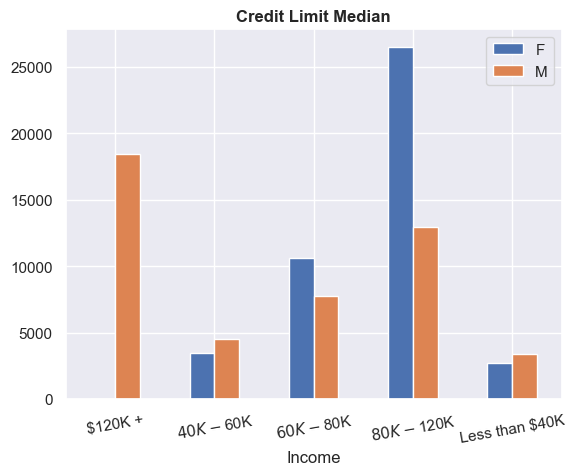

In [38]:
x = df.groupby(['Income','Gender'])[['Credit_Limit']].agg('median').reset_index()
x.pivot(index='Income', columns='Gender').plot(kind='bar',rot = 10)
plt.legend(['F','M'])
plt.title('Credit Limit Median', weight='bold')
plt.show()

>Q6.Bagaimana karakteristik Gender dan Income terhadap Credit Limit?<br>
Ada insight yang cukup menarik pada plot diatas. Pada income <60K yang didominasi kebanyakan oleh Female, median Credit_Limitnya justru lebih tinggi yang Male. Namun seiring Income bertambah, median Credit_Limit Female malah semakin tinggi meninggalkan yang Male. Kesimpulannya adalah semakin tinggi Income maka semakin tinggi juga median Credit_Limitnya tetapi kenaikannya sangat jauh lebih extreme Female dari pada Male. Secara tidak langsung, wanita berincome tinggi lebih sering berbelanja lebih banyak atau lebih mahal dari pada pria di range income yang sama.

In [39]:
def prob_plot(df,colom,x):
    means = df[colom].mean()
    medians = df[colom].median()
    data = df[df.Attrition == 'Attrited'][colom].astype('float64')
    data1 = df[df.Attrition == 'Existing'][colom].astype('float64')
    
    kde = gaussian_kde(data)
    kde1 = gaussian_kde(data1)
    dist_space = np.linspace( min(data), max(data), 200)
    dist_space1 = np.linspace( min(data1), max(data1), 200)
    axarr[x].plot( dist_space, kde(dist_space), label='Attrited', color='orange' )
    axarr[x].plot( dist_space1, kde1(dist_space1), label='Existing', color='blue')
    axarr[x].axvline(x = means, linestyle = '--', color='g', label='Mean')
    axarr[x].axvline(x = medians, linestyle = '--', color='r', label='Median')
    axarr[x].set_title('Attrition Probability', fontweight='bold', size=12)
    axarr[x].set(ylabel = 'Probability', xlabel = colom)
    axarr[x].legend()

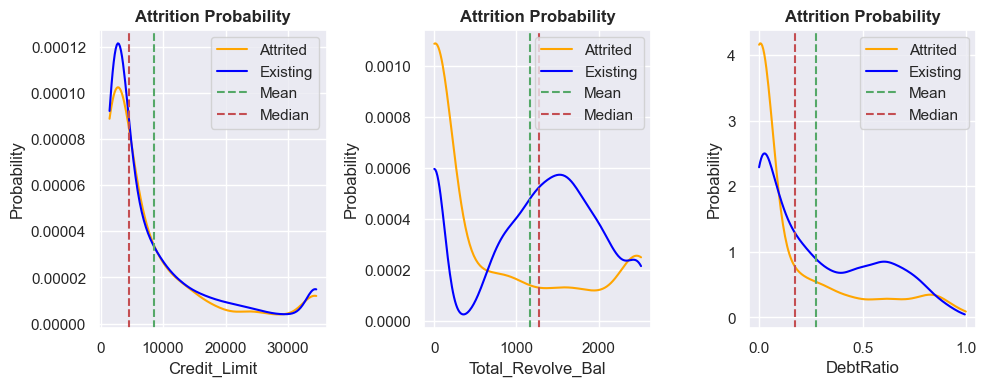

In [40]:
fig, axarr = plt.subplots(1,3, figsize=(10, 4))
prob_plot(df,'Credit_Limit',0)
prob_plot(df,'Total_Revolve_Bal',1)
prob_plot(df,'DebtRatio',2)
plt.tight_layout(pad = 1)

>Q7.Bagaimana hubungan customer yang attrited dan existing pada Credit Limit, Total Revolve Bal dan DebtRatio?<br>
Walaupun pertanyaan ini bisa dijawab pada multivariate analysis diatas, disini saya coba untuk mem-plotnya lebih jelas.<br>
1.Tidak ada relationship yang jelas di plot Credit_Limit.<br>
2.Dapat dilihat bahwa Total_Revolve_Bal dibawah 800 tingkat attritionnya adalah yang tertinggi.<br>
3.Terlihat semakin tinggi debt ratio maka semakin rendah attrition probabilitynya.<br>
Sekarang, melihat point nomor 3 dimana DebtRatio yang tinggi tidak meningkatkan attrition probability maka menurut saya customer dengan DebtRatio tertinggi adalah customer yang paling menguntungkan (dalam jumlah Credit Limit yang sama). Kenapa? Karena jika customer tidak membayar tagihan kartu kredit dengan tepat waktu maka ia akan dikenakan denda atau bunga yang lebih tinggi. Dengan logika ini, semakin tinggi DebtRatio maka semakin tinggi denda / bunga yang bisa dikenakan bank ke customer.

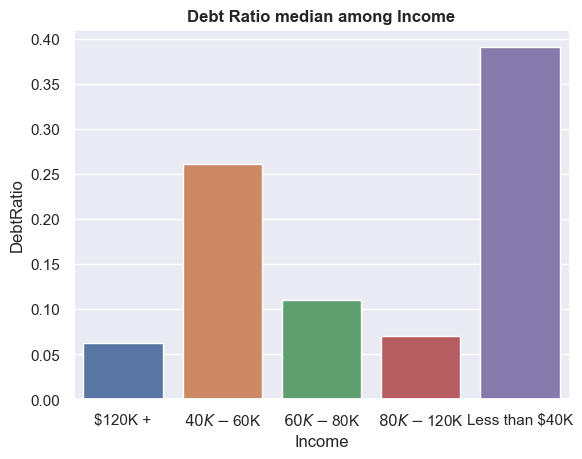

In [41]:
sns.barplot(df.groupby('Income')[['DebtRatio']].median().reset_index(), x='Income',y='DebtRatio')
plt.title('Debt Ratio median among Income', weight='bold')
plt.show()

>Q8.Bagaimana hubungan DebtRatio terhadap Income? di segmentasi Income manakah DebtRatio tertinggi?<br>
Rata-rata DebtRatio tertinggi ada di kategori 'Less than 40K' sebesar hampir 0.40 yang artinya rata2 customer pada segmen ini tidak bisa membayar tunggakan kartu kreditnya dengan tepat waktu yang besarnya hampir setengah kali lipat dari limit kartu kredit mereka. Bisa dilihat juga, semakin tinggi Income maka semakin kecil DebtRationya.

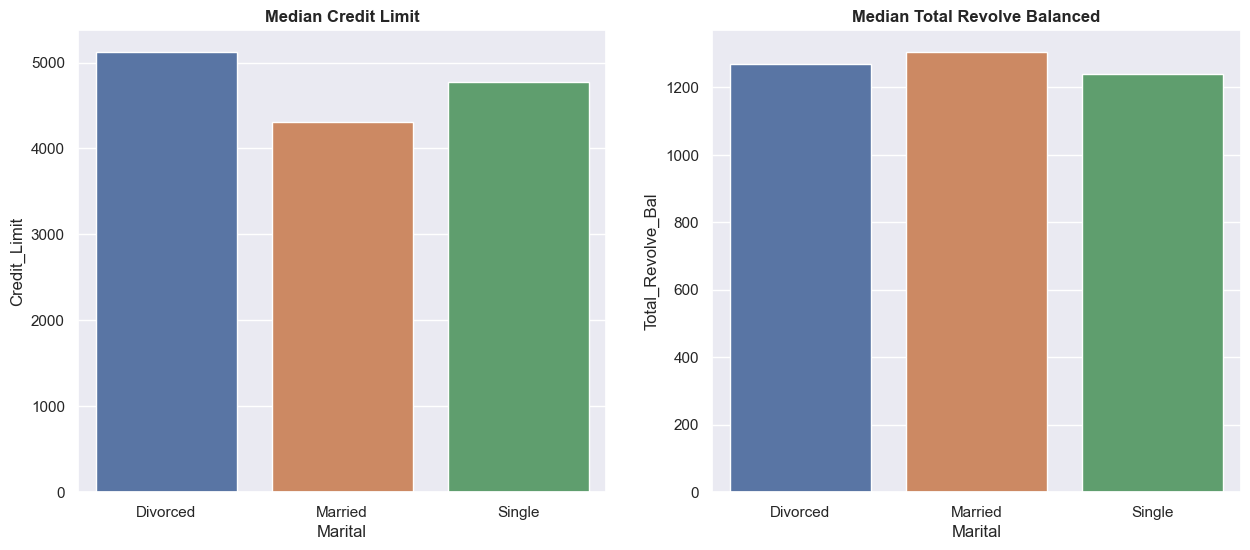

In [42]:
fig, axarr = plt.subplots(1,2, figsize=(15, 6))
sns.barplot(df.groupby(['Marital'])['Credit_Limit'].median().reset_index(), x='Marital',y='Credit_Limit', ax=axarr[0])
sns.barplot(df.groupby(['Marital'])['Total_Revolve_Bal'].median().reset_index(), x='Marital',y='Total_Revolve_Bal', ax=axarr[1])
axarr[0].set_title('Median Credit Limit', weight='bold')
axarr[1].set_title('Median Total Revolve Balanced', weight='bold')
plt.show()

>Q9.Jelaskan hubungan Marital dengan Credit Limit dan Total Revolve Balanced.<br>
Married merupakan kategori marital dengan Credit Limit terendah tetapi jumlah Total_Revolve_Bal(jumlah tunggakan) adalah yang tertinggi.

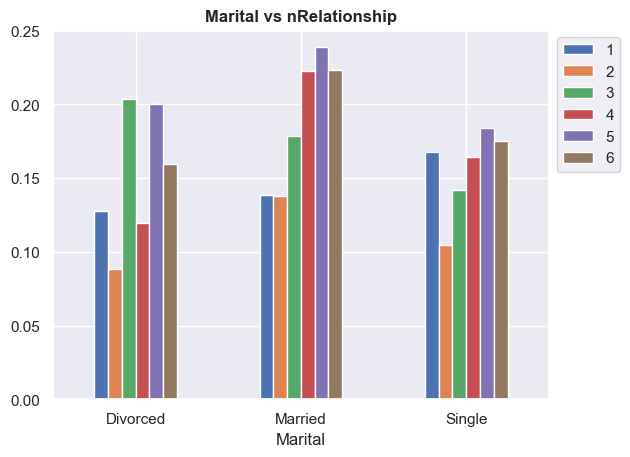

In [43]:
x = df.groupby(['Marital','nRelationship'])['DebtRatio'].median().reset_index()
x.pivot(index='Marital', columns='nRelationship').plot(kind='bar',rot = 0)
plt.legend([1,2,3,4,5,6],bbox_to_anchor=(1, 1))
plt.title('Marital vs nRelationship', weight='bold')
plt.show()

>Q10. Bagaimana hubungan Marital dan jumlah produk yang diambil (nRelationship) terhadap Debt Ratio?<br> 
Pada kategori customer yang sudah berkeluarga terlihat pattern bahwa semakin banyak produk yang diambil (nRelationship) maka semakin tinggi DebtRationya. Sedangkan untuk yang tidak berkeluarga (Divorced & Single) terlihat bahwa nRelationship tidak begitu berpengaruh.